# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [91]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [92]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [93]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [94]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [95]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [96]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19096437,
            "id": 1,
            "last_updated": 1658108608,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 400545189199,
                    "percent_change_1h": 0.525525637425979,
                    "percent_change_24h": -0.757183382179924,
                    "percent_change_7d": 0.536675337186028,
                    "percentage_change_1h": 0.525525637425979,
                    "percentage_change_24h": -0.757183382179924,
                    "percentage_change_7d": 0.536675337186028,
                    "price": 20972.0,
                    "volume_24h": 30171193587
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19096437,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [97]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119721739,
            "id": 1027,
            "last_updated": 1658108631,
            "max_supply": 119721739,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 162650198717,
                    "percent_change_1h": 0.699253630797061,
                    "percent_change_24h": 1.67737216528188,
                    "percent_change_7d": 16.1732114294999,
                    "percentage_change_1h": 0.699253630797061,
                    "percentage_change_24h": 1.67737216528188,
                    "percentage_change_7d": 16.1732114294999,
                    "price": 1358.08,
                    "volume_24h": 14657452753
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119721739,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [98]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
print(f"BTC Price is {btc_price}")


BTC Price is 20972.0


In [99]:
# Navigate the BTC response object to access the current price of ETH
eth_price =  eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"ETH Price is {eth_price}")


ETH Price is 1358.08


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [100]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"Current value of BTC in wallet is {btc_value}")


Current value of BTC in wallet is 25166.399999999998


In [101]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"Current value of ETH in wallet is {eth_value}")


Current value of ETH in wallet is 7197.824


In [102]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Current value of crypto portfolio is {total_crypto_wallet}")


Current value of crypto portfolio is 32364.224


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [103]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [104]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    'https://paper-api.alpaca.markets',
    api_version="v2")
#Account test
account = alpaca.get_account()
account.status


'ACTIVE'

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [113]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz = "America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [116]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df



# Reorganize the DataFrame
# Separate ticker data

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis = 1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head(5)


SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-08-07 04:00:00+00:00  333.29  334.8800  332.3000  334.57  57282821   
2020-08-10 04:00:00+00:00  335.00  335.7700  332.9550  335.57  46010808   
2020-08-11 04:00:00+00:00  336.86  337.5400  332.0100  332.80  69601087   
2020-08-12 04:00:00+00:00  335.47  338.2800  332.8377  337.44  53914841   
2020-08-13 04:00:00+00:00  336.58  338.2514  335.8300  336.83  41819943   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.730  119.395   
2020-08-10 04:00:00+00:00      284608  335.006397  119.62  119.635  119.280   
2020-08-11 04:00:00+00:00      385851  335.212188  119.11  119.210  118.840   
2020-08-12 04:00:00+00:00      312589  336.715356  118.73  118.890  118.650   
2020-08-13 04:00:00+00:00      278290  337.208390  118.77  118.780  118.240   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306  
2020-08-10 04:00:00+00:00  119.32  5152701       16680  119.403983  
2020-08-11 04:00:00+00:00  118.99  7809897       19839  118.963269  
2020-08-12 04:00:00+00:00  118.75  5524629       16150  118.765101  
2020-08-13 04:00:00+00:00  118.31  8024370       24612  118.442935

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [117]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio['AGG']['close']

# Print the AGG closing price
agg_close_price


timestamp
2020-08-07 04:00:00+00:00    119.43
2020-08-10 04:00:00+00:00    119.32
2020-08-11 04:00:00+00:00    118.99
2020-08-12 04:00:00+00:00    118.75
2020-08-13 04:00:00+00:00    118.31
                              ...  
2022-07-11 04:00:00+00:00    101.70
2022-07-12 04:00:00+00:00    101.84
2022-07-13 04:00:00+00:00    102.21
2022-07-14 04:00:00+00:00    101.85
2022-07-15 04:00:00+00:00    102.25
Name: close, Length: 488, dtype: float64

In [118]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio['SPY']['close']

# Print the SPY closing price
spy_close_price


timestamp
2020-08-07 04:00:00+00:00    334.57
2020-08-10 04:00:00+00:00    335.57
2020-08-11 04:00:00+00:00    332.80
2020-08-12 04:00:00+00:00    337.44
2020-08-13 04:00:00+00:00    336.83
                              ...  
2022-07-11 04:00:00+00:00    384.23
2022-07-12 04:00:00+00:00    380.83
2022-07-13 04:00:00+00:00    378.83
2022-07-14 04:00:00+00:00    377.91
2022-07-15 04:00:00+00:00    385.13
Name: close, Length: 488, dtype: float64

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [121]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price[end_date]

# Print the current value of the bond portfolio
agg_value


20450.0

In [122]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price[end_date]

# Print the current value of the stock portfolio
spy_value


42364.3

In [123]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


62814.3

In [124]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
total_portfolio


95178.524

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [146]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data

[32364.224, 62814.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [153]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data=savings_data, index=["total_crypto_wallet", "total_stocks_bonds"], columns=["amount"])

# Display the savings_df DataFrame
savings_df


,amount
total_crypto_wallet,32364.224
total_stocks_bonds,62814.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='amount'>], dtype=object)

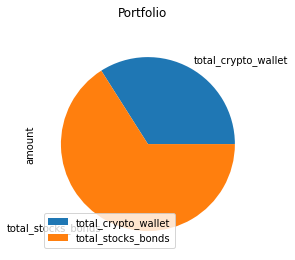

In [162]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(subplots=True,title = "Portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [163]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [164]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Great! You have enough money in your fund!")
elif total_portfolio == emergency_fund_value:
    print("Great job reaching this financial goal!")
else:
    print(f'You are {total_portfolio-emergency_fund_value} away from reaching your goal!')


Great! You have enough money in your fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [165]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date #= pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()
end_date   #= pd.Timestamp("2022-07-15", tz = "America/New_York").isoformat()


'2022-07-15T00:00:00-04:00'

In [170]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

# Concatenate the ticker DataFrames
# YOUR CODE HERE

# Display both the first and last five rows of the DataFrame
df_portfolio.head(5)

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-07-11 04:00:00+00:00  385.91  386.8700  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.1600  378.990  380.83  62027220   
2022-07-13 04:00:00+00:00  375.09  381.9200  374.658  378.83  83575452   
2022-07-14 04:00:00+00:00  373.99  379.0498  371.040  377.91  89349688   
2022-07-15 04:00:00+00:00  382.62  385.2500  380.540  385.13  79318992   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.92  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.19  101.8200   
2022-07-13 04:00:00+00:00      671953  378.819688  101.23  102.24  101.1900   
2022-07-14 04:00:00+00:00      637416  375.589384  101.51  101.98  101.3300   
2022-07-15 04:00:00+00:00      488124  383.334989  101.94  102.35  101.9000   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478  
2022-07-14 04:00:00+00:00  101.85  6224496       24722  101.747120  
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854

In [171]:
df_portfolio.tail(5)

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-07-11 04:00:00+00:00  385.91  386.8700  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.1600  378.990  380.83  62027220   
2022-07-13 04:00:00+00:00  375.09  381.9200  374.658  378.83  83575452   
2022-07-14 04:00:00+00:00  373.99  379.0498  371.040  377.91  89349688   
2022-07-15 04:00:00+00:00  382.62  385.2500  380.540  385.13  79318992   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.92  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.19  101.8200   
2022-07-13 04:00:00+00:00      671953  378.819688  101.23  102.24  101.1900   
2022-07-14 04:00:00+00:00      637416  375.589384  101.51  101.98  101.3300   
2022-07-15 04:00:00+00:00      488124  383.334989  101.94  102.35  101.9000   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478  
2022-07-14 04:00:00+00:00  101.85  6224496       24722  101.747120  
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [175]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data=df_portfolio,
    weights = [.60, .40],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head()

SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-08-07 04:00:00+00:00  333.29  334.8800  332.3000  334.57  57282821   
2020-08-10 04:00:00+00:00  335.00  335.7700  332.9550  335.57  46010808   
2020-08-11 04:00:00+00:00  336.86  337.5400  332.0100  332.80  69601087   
2020-08-12 04:00:00+00:00  335.47  338.2800  332.8377  337.44  53914841   
2020-08-13 04:00:00+00:00  336.58  338.2514  335.8300  336.83  41819943   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-08-07 04:00:00+00:00      350100  333.800372          NaN  119.66   
2020-08-10 04:00:00+00:00      284608  335.006397     0.002989  119.62   
2020-08-11 04:00:00+00:00      385851  335.212188    -0.008255  119.11   
2020-08-12 04:00:00+00:00      312589  336.715356     0.013942  118.73   
2020-08-13 04:00:00+00:00      278290  337.208390    -0.001808  118.77   

                                                                          \
                              high      low   close   volume trade_count   
timestamp                                                                  
2020-08-07 04:00:00+00:00  119.730  119.395  119.43  5559066       15246   
2020-08-10 04:00:00+00:00  119.635  119.280  119.32  5152701       16680   
2020-08-11 04:00:00+00:00  119.210  118.840  118.99  7809897       19839   
2020-08-12 04:00:00+00:00  118.890  118.650  118.75  5524629       16150   
2020-08-13 04:00:00+00:00  118.780  118.240  118.31  8024370       24612   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-08-07 04:00:00+00:00  119.475306          NaN  
2020-08-10 04:00:00+00:00  119.403983    -0.000921  
2020-08-11 04:00:00+00:00  118.963269    -0.002766  
2020-08-12 04:00:00+00:00  118.765101    -0.002017  
2020-08-13 04:00:00+00:00  118.442935    -0.003705

In [182]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


KeyboardInterrupt: 

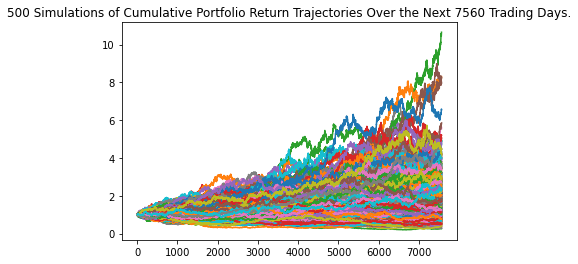

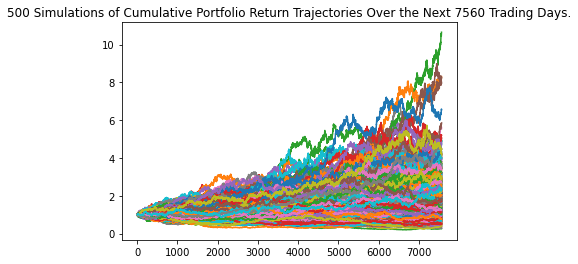

In [181]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_line_plot = MC_thirty_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

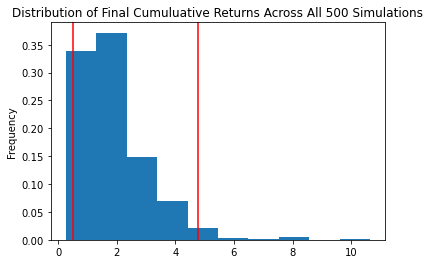

In [183]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_line_dis = MC_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [186]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_stats = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_summary_stats)

count           500.000000
mean              1.894517
std               1.228507
min               0.260402
25%               1.087309
50%               1.570306
75%               2.419977
max              10.651103
95% CI Lower      0.507258
95% CI Upper      4.784666
Name: 7560, dtype: float64


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?
    Lower: 0.5
    Upper: 4.8


In [188]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Current balance: {total_stocks_bondsprint(f'Current balance: {total_stocks_bonds}')
}')


Current balance: 62814.3


In [190]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_stats[8]*total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_stats[9]*total_stocks_bonds

# Print the result of your calculations
print(f'With 95% confidence interval, upper: {ci_upper_thirty_cumulative_return} '
    f'With 95% confidence interval, lower: {ci_lower_thirty_cumulative_return}')


With 95% confidence interval, upper: 300545.42598959286 With 95% confidence interval, lower: 31863.044736530275


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [197]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data=df_portfolio,
    weights = [.80, .20],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
MC_ten_year.portfolio_data.head()


SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-08-07 04:00:00+00:00  333.29  334.8800  332.3000  334.57  57282821   
2020-08-10 04:00:00+00:00  335.00  335.7700  332.9550  335.57  46010808   
2020-08-11 04:00:00+00:00  336.86  337.5400  332.0100  332.80  69601087   
2020-08-12 04:00:00+00:00  335.47  338.2800  332.8377  337.44  53914841   
2020-08-13 04:00:00+00:00  336.58  338.2514  335.8300  336.83  41819943   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-08-07 04:00:00+00:00      350100  333.800372          NaN  119.66   
2020-08-10 04:00:00+00:00      284608  335.006397     0.002989  119.62   
2020-08-11 04:00:00+00:00      385851  335.212188    -0.008255  119.11   
2020-08-12 04:00:00+00:00      312589  336.715356     0.013942  118.73   
2020-08-13 04:00:00+00:00      278290  337.208390    -0.001808  118.77   

                                                                          \
                              high      low   close   volume trade_count   
timestamp                                                                  
2020-08-07 04:00:00+00:00  119.730  119.395  119.43  5559066       15246   
2020-08-10 04:00:00+00:00  119.635  119.280  119.32  5152701       16680   
2020-08-11 04:00:00+00:00  119.210  118.840  118.99  7809897       19839   
2020-08-12 04:00:00+00:00  118.890  118.650  118.75  5524629       16150   
2020-08-13 04:00:00+00:00  118.780  118.240  118.31  8024370       24612   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-08-07 04:00:00+00:00  119.475306          NaN  
2020-08-10 04:00:00+00:00  119.403983    -0.000921  
2020-08-11 04:00:00+00:00  118.963269    -0.002766  
2020-08-12 04:00:00+00:00  118.765101    -0.002017  
2020-08-13 04:00:00+00:00  118.442935    -0.003705

In [198]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 110.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 120.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 130.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 140.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 150.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 160.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 170.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 180.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 190.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 200.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 210.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 220.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 230.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 240.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 250.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 260.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 270.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 280.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 290.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

KeyboardInterrupt: 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 110.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 120.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 130.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 140.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 150.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 160.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 170.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 180.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 190.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 200.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 210.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 220.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 230.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 240.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 250.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 260.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 270.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 280.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 290.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 300.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 310.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 320.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 330.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 340.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 350.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 360.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 370.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 380.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 390.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 400.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 410.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 420.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 430.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 440.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 450.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 460.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 470.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 480.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

Running Monte Carlo simulation number 490.


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:1

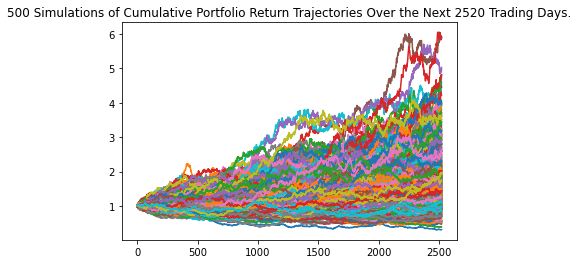

In [199]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_line_plot_10_year = MC_ten_year.plot_simulation()



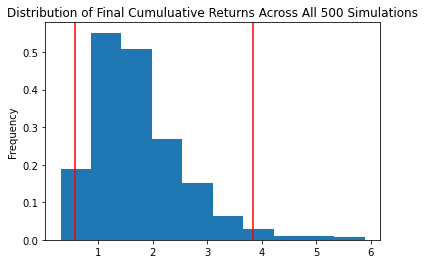

In [200]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_line_dis_10_year = MC_ten_year.plot_distribution()



In [201]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_stats_10_year = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_stats_10_year)

count           500.000000
mean              1.731701
std               0.851107
min               0.307023
25%               1.104746
50%               1.588069
75%               2.101061
max               5.892385
95% CI Lower      0.569416
95% CI Upper      3.845830
Name: 2520, dtype: float64


/Users/erick/Documents/Fintech-Workspace/Fintech/Financial_Planning-Forecasting/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Current balance: {total_stocks_bonds}')


In [203]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_10_cumulative_return = MC_summary_stats_10_year[8]*total_stocks_bonds
ci_upper_10_cumulative_return = MC_summary_stats_10_year[9]*total_stocks_bonds

# Print the result of your calculations
print(f'With 95% confidence interval, upper: {ci_upper_10_cumulative_return} '
    f'With 95% confidence interval, lower: {ci_lower_10_cumulative_return}')




With 95% confidence interval, upper: 241573.12478846795 With 95% confidence interval, lower: 35767.472748757085


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?